In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [3]:

datas = pd.read_csv('hello_fresh - Sheetmeal.csv')
datas
datas = datas.rename({'Date & time':'date'}, axis = 1)
datas['date'] = pd.to_datetime(datas['date']).dt.strftime("%y-%m-%d")
# datas = datas.drop(['Date & time'], axis=1)

In [4]:

def get_tcpa_range(data):

  initial = []
  final = []
  dates = []
  campaigns = []
  ad_group = []
  # data["Changes"]
  level = []
  # data["Date & time"]
  # print(type(data["Changes"]))
  for i in range(len(data["Changes"])):
    if "Target CPA" in data["Changes"][i]:
      # print(i)
      # print(data["Changes"][i])
      # print(data["Date & time"][i])
      dates.append(data["date"][i])
      campaigns.append(data["Campaign"][i])
      ad_group.append(data["Ad group"][i])
      

    
      if "Campaign" in data["Changes"][i]:
        level.append("campaign")

      else:
        level.append("ad group")
    
      # print((i))
      k = data["Changes"][i].split(" ")
      # print(i)
    
      for j in k:
        if "to" == j:
          initial.append(float(k[k.index(j)-1].replace("$","")))
          final.append(float(k[k.index(j)+1].replace("$","")))
        
    
  df= pd.DataFrame()
  df["date"]= dates
  df["initial"] = initial
  df["final"] = final
  df["level"] = level
  df["Campaign name"]= campaigns
  df["Ad group name"] = ad_group
  
  return df 

In [5]:
tcpa = get_tcpa_range(datas)
df= tcpa 
# df
tcpa

,date,initial,final,level,Campaign name,Ad group name
0,22-07-05,120.0,126.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
1,22-07-04,111.0,120.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
2,22-06-28,99.0,105.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
3,22-06-03,107.0,111.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
4,22-06-03,99.0,107.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
5,22-05-31,95.0,99.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
6,22-05-17,105.0,95.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
7,22-05-17,95.0,105.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
8,22-05-17,93.0,95.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN
9,22-05-14,80.0,93.0,campaign,US-S[01]: Prospecting | Brand | Meals - Exact,NaN


In [6]:
data = pd.read_csv('TCPA strategy - Hellofresh-metric.csv')
data.rename(columns={'Date':'date','Ad group ID':'ad_group_id','Campaign ID':'campaign_id','Cost':'cost','Keyword ID':'keyword_id','Cost per conversion':'cost_per_conversion','Conversions':'conversions','Clicks':'clicks','Impressions':'impressions','Impression share':'impression_share','Keyword':'keyword'},inplace=True)


data_meals = data[data["Campaign name"]== "US-S[01]: Prospecting | Brand | Meals - Exact"].copy()

data_meals['weekday'] = pd.to_datetime(data_meals['date']).dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_meals['weekday'] = pd.Categorical(data_meals['weekday'], categories=cats, ordered=True)
data_meals['date'] = pd.to_datetime(data_meals['date']).dt.strftime("%y-%m-%d")


In [7]:

# tcpa
tcpa = tcpa[tcpa["level"]== 'ad group']
tcpa


,date,initial,final,level,Campaign name,Ad group name
0,22-07-05,120.0,126.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
1,22-07-04,111.0,120.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
3,22-06-03,107.0,111.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
4,22-06-03,99.0,107.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
11,22-04-30,93.0,99.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
15,22-04-20,85.0,93.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
16,22-04-18,83.0,85.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
17,22-04-17,75.0,83.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
18,22-04-17,55.0,75.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals
19,22-04-16,51.0,55.0,ad group,US-S[01]: Prospecting | Brand | Meals - Exact,Meals


In [9]:

data1 = pd.merge(data_meals,tcpa,on=['date'], how = "left")
data1["final"].fillna(method ="ffill", inplace = True)
# df.fillna(method='ffill')


data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3541 entries, 0 to 3540
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   date                                3541 non-null   object  
 1   campaign_id                         3541 non-null   int64   
 2   ad_group_id                         3541 non-null   int64   
 3   keyword_id                          3541 non-null   int64   
 4   keyword                             3541 non-null   object  
 5   Match type                          3541 non-null   object  
 6   Bidding strategy type               3541 non-null   object  
 7   Ad group name_x                     3541 non-null   object  
 8   Campaign name_x                     3541 non-null   object  
 9   impressions                         3541 non-null   int64   
 10  clicks                              3541 non-null   int64   
 11  cost                          

In [8]:
count = 0
for i in tcpa['final']:
  count = count+1
  # print(i)
  data = data1[data1["final"] == i]
  # print(data)
  #find top ad_groups basis spends
  analysis = data.groupby(['ad_group_id'])['cost'].sum().reset_index().sort_values('cost',ascending=False,ignore_index = True)
  analysis["Cost_cumsum"] = analysis["cost"].cumsum()
  analysis["cost_share"] = analysis["cost"].cumsum()/analysis['cost'].sum()


  #take top 10 adgroups
  top_adgroups = analysis[:10]['ad_group_id'].values
  # print(top_adgroups)


  df = data[data['ad_group_id'].isin(top_adgroups)].copy()

  analysis = df.groupby('ad_group_id')[['final','cost','conversions','impression_share',"clicks"]].agg({'final':'mean','cost':'sum','conversions':'sum','impression_share':'mean',"clicks":"sum",})
  analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']
  if count == 1:
    new = analysis
  new = pd.concat([new, analysis])
new = new.iloc[1:,:]
# print(new)


In [9]:
#  new["cost_per_conv_delta"] = new["cost_per_conv"].diff() 
#  new["clicks_delta"] = new["clicks"].diff()
#  new["impression_share_delta"] = new["impression_share"].diff()
# new["conversions_delta"] = new["conversions"].diff()
# new

In [948]:
import seaborn as sns

# average level graphs
### cost ka graph ad krana h 
##  average cost_per_conv vs tcpa (reg plot from sns) (remove outlier)
## average cost_per_conv vs clicks 
## average cost_per_conv vs  impression  share 
## average cost_per_conv vs  conversion
## clicks vs conversion 
## delta graphs average wise 
## cpa vs conversions
### cpa vs cliks 
### 
## delta at date level 

In [1023]:
# #grpah plot for this 

# # sns.regplot(x= "cost_per_conv", y= "impression_share", data= analysis, order = 2)
# sns.regplot(x='final',y='cost_per_conv', data = new , order = 2)



In [1024]:
# sns.regplot(x='final',y='conversions',  data = new , order = 2)


In [1025]:
# sns.regplot(x='final',y='cost', data = new , order = 2)


In [1026]:

# sns.regplot(x='final',y='impression_share',  data = new , order = 2)

# cost_per_conv vs

In [1027]:

# print(sns.regplot(x='cost_per_conv',y='impression_share',  data = new , order = 2))


In [1028]:
# print(sns.regplot(x='cost_per_conv',y='clicks',  data = new , order = 2))

In [1029]:
# sns.regplot(x='cost_per_conv',y='conversions',  data = new , order = 2)

In [1030]:
# sns.regplot(x='cost_per_conv',y='clicks',  data = new , order = 2)

In [1031]:
# sns.regplot(x='impression_share',y='clicks',  data = new , order = 2)

<AxesSubplot:xlabel='clicks', ylabel='conversions'>

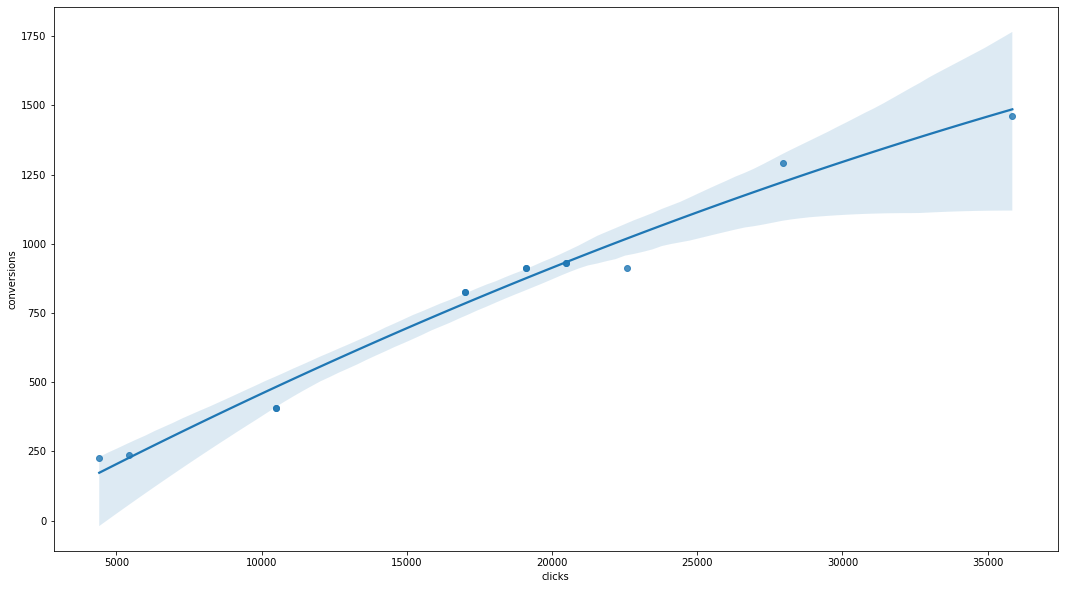

In [777]:
sns.regplot(x='clicks',y='conversions',  data = new , order = 2)

# delta average graphs

In [1032]:
# sns.regplot(x='cost_per_conv_delta',y='impression_share_delta',  data = new , order = 2)

In [1033]:
# sns.regplot(x='cost_per_conv_delta',y='clicks_delta',  data = new , order = 2)

In [1034]:
# sns.regplot(x='cost_per_conv_delta',y='conversions_delta',  data = new , order = 2)

# for sensitivity check

data1

In [783]:
# data1

In [807]:
# data1["final"]

analysis = data1.groupby(['date','ad_group_id'])[['cost','conversions','final','clicks','impressions','impression_share',"Absolute top impression percentage","Conversion rate"]].agg({'cost':'sum','conversions':'sum','final':'mean','clicks':'sum','impressions':'sum','impression_share':'mean', "Absolute top impression percentage":"mean", "Conversion rate":"mean"}).reset_index()
analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']
analysis['cost_per_click'] = analysis['cost']/analysis['clicks']

In [808]:
# count = 0
# for i in tcpa['final']:
#     count = count +1
#     if count <=5:
#         analysis[analysis["final"]==i].plot(x= "date", y= "clicks", kind = "line",figsize=(10,5),title = i)


In [809]:
# count = 0
# for i in tcpa['final']:
#     count = count +1
#     if count <=5:
#         analysis[analysis["final"]==i].plot(x= "date", y= "conversions", kind = "line",figsize=(10,5),title = i)

In [810]:
# count = 0
# for i in tcpa['final']:
#     count = count +1
#     if count <=5:
#         analysis[analysis["final"]==i].plot(x= "date", y= "cost_per_conv", kind = "line",figsize=(10,5),title = i)

In [811]:
# count = 0
# for i in tcpa['final']:
#     count = count +1
#     if count <=5:
#        analysis[analysis["final"]==i].plot(x= "cost_per_conv", y= "clicks", kind = "scatter",figsize=(10,5),title = i)

In [812]:
# count = 0
# for i in tcpa['final']:
#     count = count +1
#     if count <=5:
#         analysis[analysis["final"]==i].plot(x= "cost_per_conv", y= "impression_share", kind = "scatter",figsize=(10,5),title = i)

# date wise graphs 

In [813]:
import seaborn as sns
analysis

,date,ad_group_id,cost,conversions,final,clicks,impressions,impression_share,Absolute top impression percentage,Conversion rate,cost_per_conv,cost_per_click
0,22-01-01,104499295183,2240.03,85.67,NaN,1337,3392,0.854118,0.529412,3.199231,26.147193,1.675415
1,22-01-02,104499295183,2695.06,77.57,NaN,1502,3849,0.831250,0.636875,2.139167,34.743586,1.794314
2,22-01-03,104499295183,3143.83,109.05,NaN,1773,4591,0.861111,0.432778,1.432000,28.829253,1.773170
3,22-01-04,104499295183,3411.84,83.24,NaN,1943,4938,0.903333,0.513889,12.095385,40.987987,1.755965
4,22-01-05,104499295183,3061.98,89.91,NaN,1804,4460,0.909412,0.527647,5.273333,34.056056,1.697328
...,...,...,...,...,...,...,...,...,...,...,...,...
182,22-07-02,104499295183,5381.06,54.85,105.0,1113,2475,0.920909,0.922727,9.028667,98.105014,4.834735
183,22-07-03,104499295183,4652.05,44.25,105.0,1027,2240,0.874500,0.786190,2.015556,105.131073,4.529747
184,22-07-04,104499295183,3955.12,32.65,105.0,963,2170,0.920435,0.697826,1.628125,121.136907,4.107082
185,22-07-05,104499295183,4877.44,35.49,105.0,1102,2459,0.933043,0.925600,12.597222,137.431389,4.425989


<AxesSubplot:xlabel='cost_per_conv', ylabel='impression_share'>

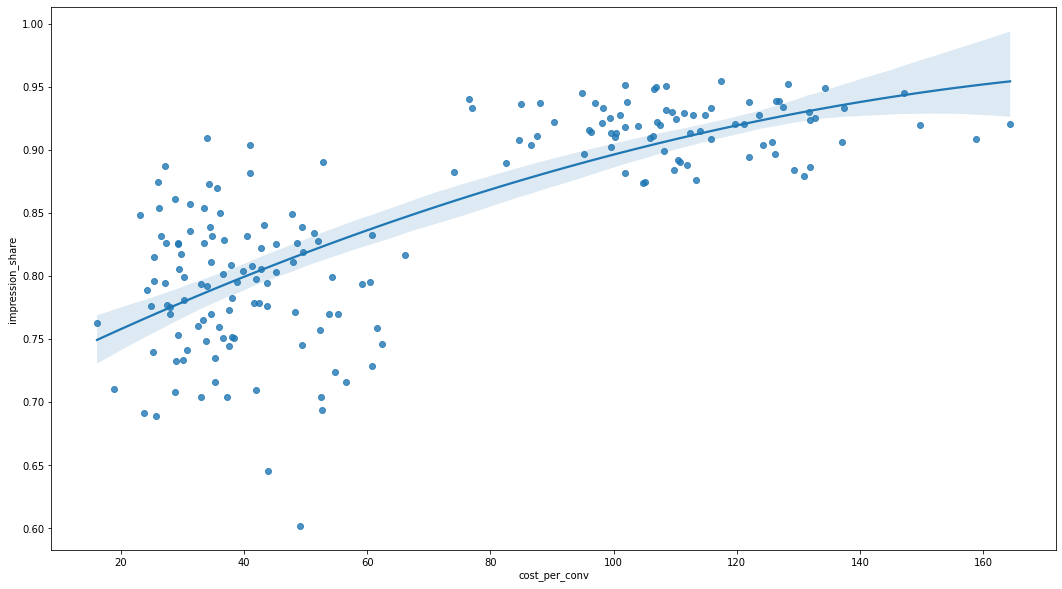

In [817]:
#  analysis.plot(x= "cost_per_conv", y= "impression_share", kind = "scatter",figsize=(10,5))
sns.regplot(x= "cost_per_conv", y= "impression_share", data= analysis[analysis["cost_per_conv"]<300] , order = 2)

In [818]:
#impression share some range and its has some saturaton value, (at cpa 50 impression share (.8 to .9)) and 
##(100-150 cpa impression share >.9

In [819]:
# data1

In [820]:
# analysis = df['rpb']
# analysis.index = pd.to_datetime(analysis.index)
# decompose_result_mult = seasonal_decompose(analysis, model="additive")
# plt.rcParams.update({'figure.figsize': (18,10)})
# decompose_result_mult.plot()

In [821]:
# tcpa["final"].hist()
# data1["final"].hist()

In [1039]:

# sns.regplot(x= "cost_per_conv", y= "clicks", data= analysis[(analysis["cost_per_conv"]<300) &( analysis["clicks"]<3000)], order = 2)

In [823]:
# analysis
# analysis[analysis["cost_per_conv"]<300]

<AxesSubplot:xlabel='cost_per_conv', ylabel='Absolute top impression percentage'>

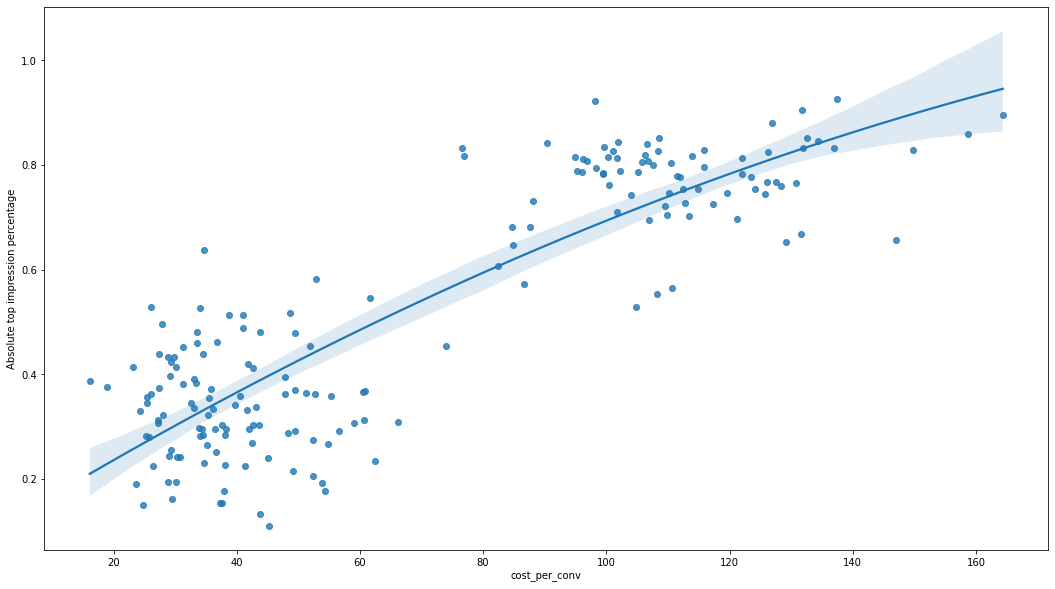

In [824]:
sns.regplot(x= "cost_per_conv", y= "Absolute top impression percentage", data= analysis[analysis["cost_per_conv"]<300], order = 2)


<AxesSubplot:xlabel='cost_per_conv', ylabel='conversions'>

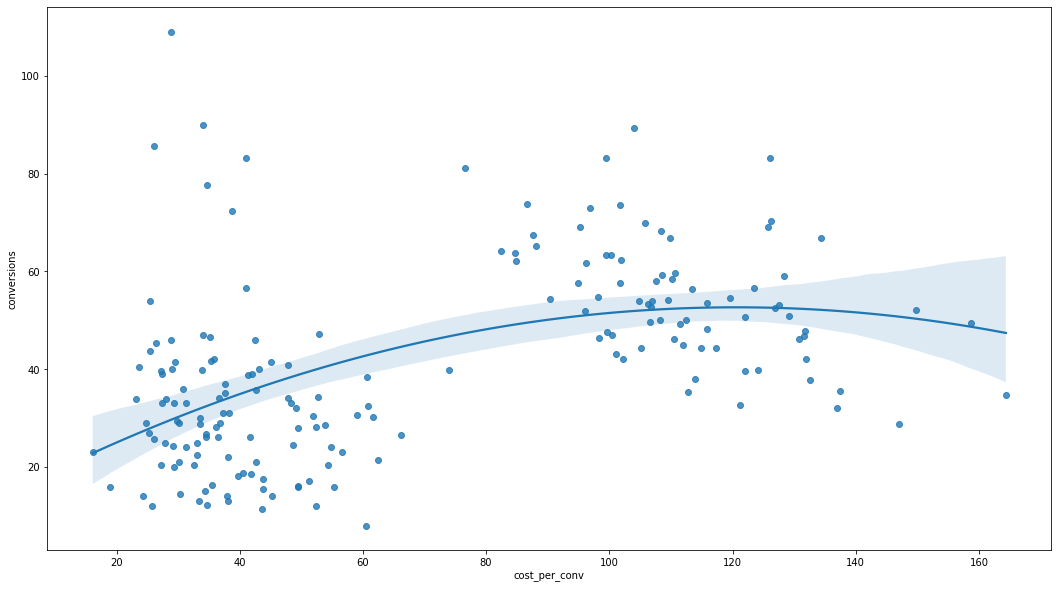

In [825]:

sns.regplot(x= "cost_per_conv", y= "conversions", data= analysis[(analysis["cost_per_conv"]<300) & (analysis["conversions"]<150)], order = 2)

In [826]:
# data1.info()

<AxesSubplot:xlabel='cost_per_click', ylabel='impression_share'>

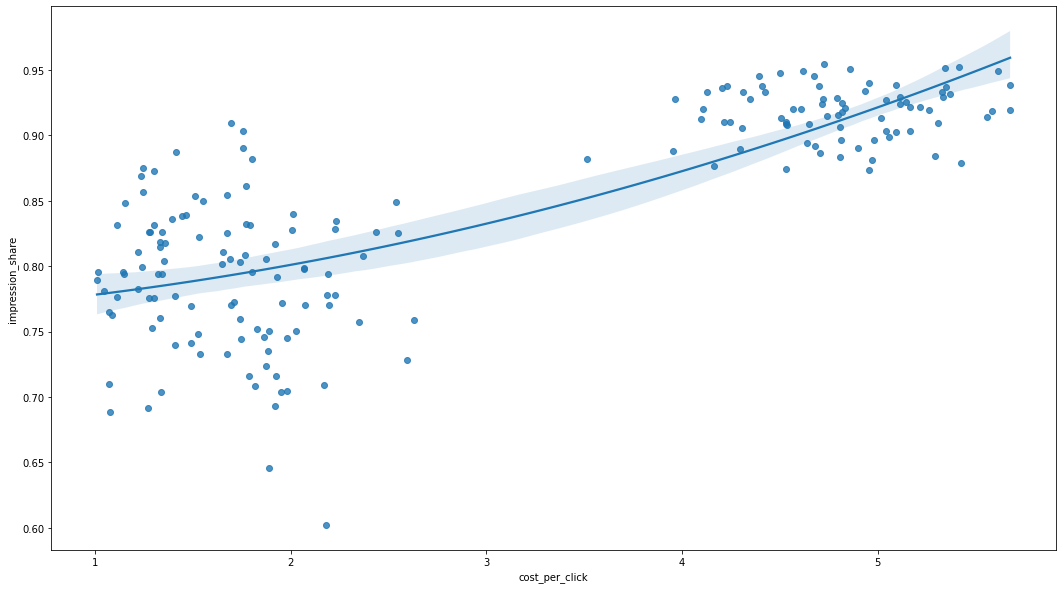

In [827]:

sns.regplot(y= "impression_share", x = "cost_per_click", data= analysis[(analysis["cost_per_conv"]<300)] , order = 2)

<AxesSubplot:xlabel='cost_per_click', ylabel='Absolute top impression percentage'>

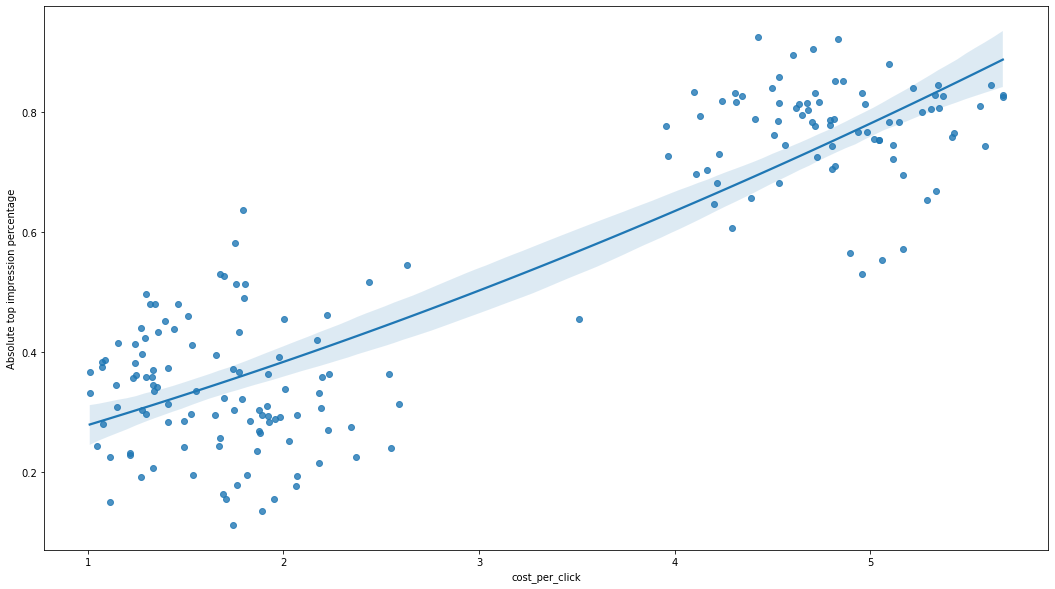

In [828]:

sns.regplot(y= "Absolute top impression percentage", x = "cost_per_click", data= analysis[(analysis["cost_per_conv"]<300)] , order = 2)

In [1035]:
# analysis

<AxesSubplot:xlabel='cost_per_conv', ylabel='Conversion rate'>

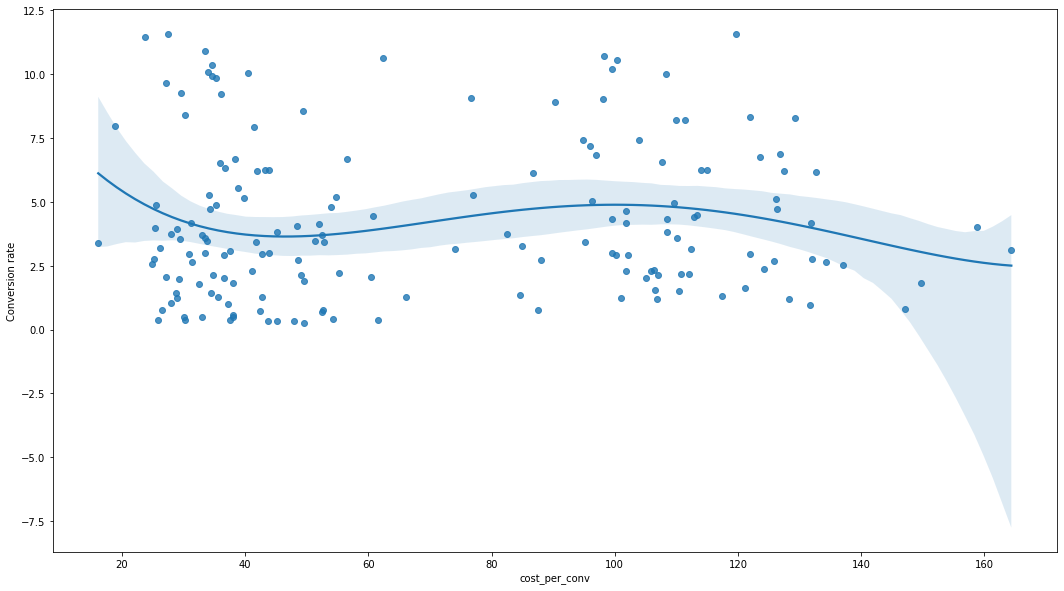

In [838]:
# Conversion rate

sns.regplot(y= "Conversion rate", x = "cost_per_conv", data= analysis[(analysis["cost_per_conv"]<300) & (analysis["Conversion rate"]<12)  ] , order = 4)
# analysi

<AxesSubplot:xlabel='cost_per_conv', ylabel='cost_per_click'>

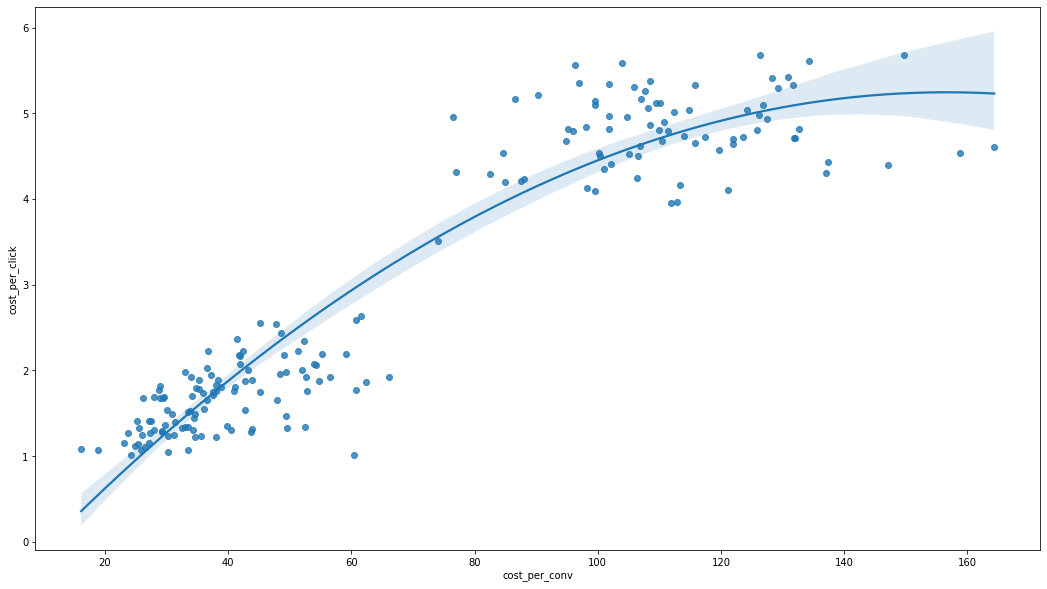

In [833]:

sns.regplot(y= "cost_per_click", x = "cost_per_conv", data= analysis[(analysis["cost_per_conv"]<300)] , order = 2)

In [1038]:

# sns.regplot(y= "impression_share", x = "cost_per_click", data= analysis[(analysis["cost_per_conv"]<300)] , order = 2)

In [1037]:
# sns.regplot(x= "cost_per_conv", y= "conversions", data= analysis[(analysis["cost_per_conv"]<200) ], order = 2)

In [1036]:
#  analysis[analysis["cost_per_conv"]<250].plot(y= "cost_per_conv", x= "final", kind = "scatter",figsize=(15,10))

In [626]:
# import matplotlib.pyplot as plt
# _,ax=plt.subplot(figsize = (18,3))
# sns.boxplot(y= "cost_per_conv", x= "final", data =  analysis, width=.8 )

In [577]:

# analysis["final"].hist()


# SEAONALITY ANALYSIS

<AxesSubplot:>

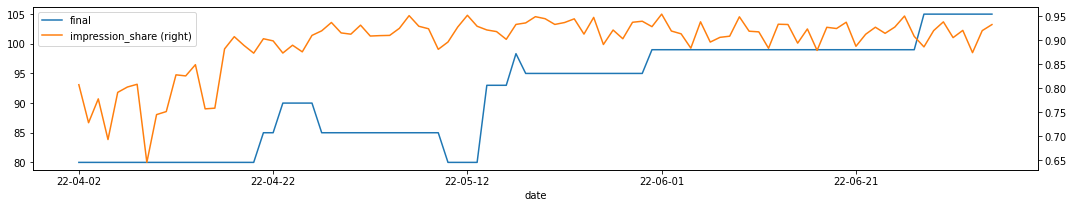

In [578]:
ax= analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "final", figsize = (18,3))
analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "impression_share",ax=ax, secondary_y =True) 


# analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "Absolute top impression percentage",ax=ax, secondary_y =True)
# analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "cost",ax=ax, secondary_y =True)



<AxesSubplot:>

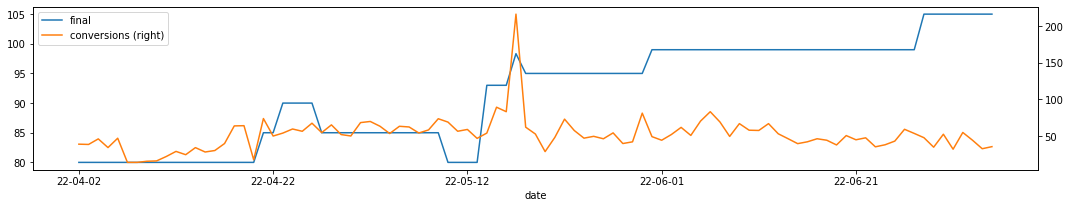

In [579]:

ax= analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "final", figsize = (18,3))
analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "conversions",ax=ax, secondary_y =True)

[]

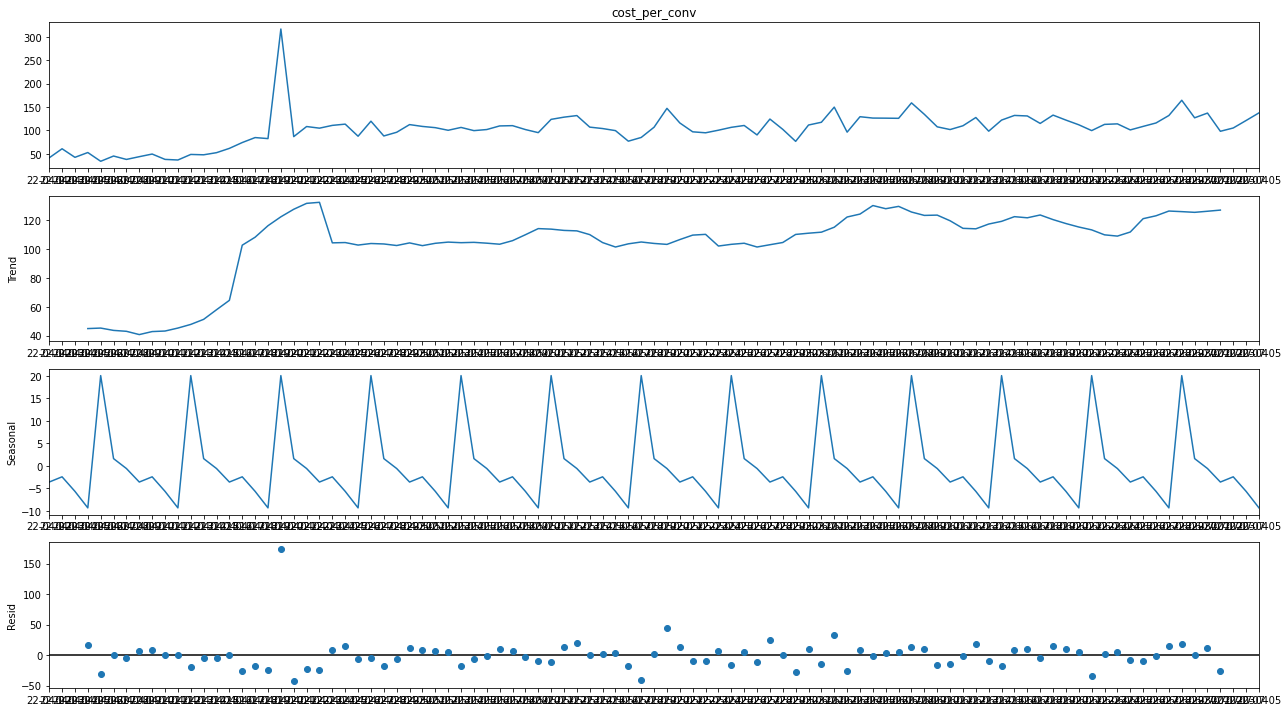

In [580]:
# analysis
analysis1 = analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")]['cost_per_conv']
analysis1.index = (analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].date)
decompose_result_mult = seasonal_decompose(analysis1, model="additive",period =7)
plt.rcParams.update({'figure.figsize': (18,10)})
decompose_result_mult.plot()
plt.plot()

<AxesSubplot:xlabel='date'>

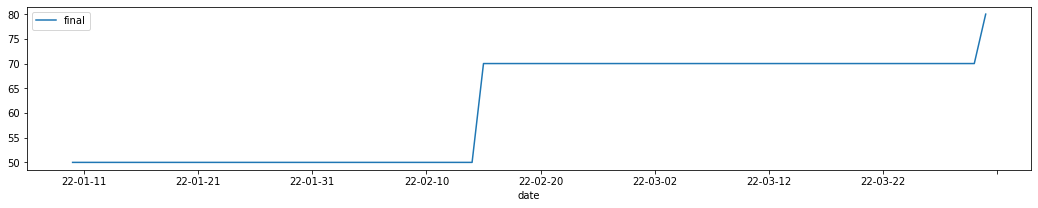

In [581]:
analysis[(analysis["date"]<"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="date", y = "final", figsize = (18,3))

In [582]:
# analysis

In [583]:
# analysis[(analysis["date"]>"22-04-01") & (analysis["date"]<"22-07-06")].plot(x="cost_per_conv", y = "co",ax=ax, secondary_y =True)

In [625]:
# analysis["cost"].sum()/analysis["conversions"].sum()

In [624]:
# analysis["final"].max()

In [623]:
#  analysis[analysis["cost_per_conv"]<250].plot(y= "conversions", x= "final", kind = "scatter",figsize=(15,10))

In [622]:
#  analysis[anazlysis["cost_per_conv"]<250].plot(y= "cost", x= "final", kind = "scatter",figsize=(15,10))

# top keyword analysis 

In [1191]:
top = data1[data1["date"]>="22-06-02"].groupby(["keyword_id","Match type","keyword"])[['conversions','cost','impression_share','Absolute top impression percentage',"final"]].agg({"conversions":"sum","cost":"sum","impression_share":"mean","Absolute top impression percentage":"mean",'final':"mean"}).reset_index().copy()

top.sort_values(["cost"], ascending =False, inplace = True ,ignore_index=True)
# print(top)
# top
top["cost_per_conv"] = top["cost"]/top["conversions"]
top['cost_cumsum'] = top['cost'].cumsum()/top['cost'].sum()
top[:15]["Absolute top impression percentage"].mean()


0.8277543417366947

In [1192]:
top[16:31]["Absolute top impression percentage"].mean()

0.787188256242668

In [1193]:
top["Absolute top impression percentage"].mean()

0.7951999073189553

In [1194]:
top

,keyword_id,Match type,keyword,conversions,cost,impression_share,Absolute top impression percentage,final,cost_per_conv,cost_cumsum
0,57112112094,Exact,hello fresh meals,1073.20,120749.78,0.986857,0.822222,108.305556,112.513772,0.569216
1,57112105614,Phrase,hello fresh meals,256.93,34494.23,0.672857,0.771389,108.305556,134.255361,0.731823
2,332557061257,Exact,hellofresh meal boxes,180.00,23406.24,0.993333,0.888529,107.823529,130.034667,0.842160
3,330678769349,Exact,hellofresh meal subscription,134.05,16647.36,0.995429,0.954444,108.305556,124.187691,0.920636
4,57112114014,Exact,hellofresh meals,22.71,3678.54,0.980286,0.799722,108.305556,161.978864,0.937977
5,442039701780,Exact,hello fresh meal deals,20.00,2807.17,0.986857,0.636571,107.800000,140.358500,0.951210
6,313662489250,Phrase,hello fresh meal kit,19.47,1608.18,0.869429,0.792000,107.800000,82.597843,0.958791
7,38825879769,Exact,hello fresh meal,9.00,1600.11,0.978857,0.793611,108.305556,177.790000,0.966334
8,413968861822,Phrase,hello fresh meal plans,11.41,1576.39,0.949429,0.866667,108.305556,138.158633,0.973765
9,329111730479,Exact,hello fresh meal kits,11.78,1013.54,0.969429,0.799167,108.305556,86.039049,0.978543


# ANALYSIS ON WEEK DAYS 

In [10]:
data1["Match type"].value_counts()

Exact     2717
Phrase     824
Name: Match type, dtype: int64

In [11]:
# data1['date'] = pd.to_datetime(data1['date']).dt.strftime("%y-%m-%d")
# data1

In [12]:
# data1['weekday'] = pd.to_datetime(data1['date']).dt.day_name()
# cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# data1['weekday'] = pd.Categorical(data1['weekday'], categories=cats, ordered= True)

In [13]:
## for every action we have thing about impression shaare 
# data1.info()
# data1["Estimated total conversion rate"].unique()

In [14]:
# data1.info()
# data1["Conversion rate"].unique()

In [15]:
analysis = data1[data1["date"]>="22-05-26"].groupby(["ad_group_id","date"])[['conversions','cost','impression_share','Absolute top impression percentage',"final","Conversion rate"]].agg({"conversions":"sum","cost":"sum","impression_share":"mean","Absolute top impression percentage":"mean",'final':"mean","Conversion rate":"mean"}).reset_index()
analysis = pd.merge(analysis,data1[['date','weekday']],how='left',on='date')
analysis = analysis.drop_duplicates()
# analysis['weekday'] = pd.to_datetime(analysis['date']).dt.day_name()
# cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# analysis['weekday'] = pd.Categorical(analysis['weekday'], categories=cats, ordered=True)
# df['weekday'] = analysis[['date']].apply(lambda x: dt.datetime.strftime(analy['date'], '%A'), axis=1)


In [16]:
# analysis

In [17]:
analysis["cost_per_conv"] = analysis["cost"]/analysis["conversions"]
# analysis

In [18]:
analysis[analysis["weekday"]=="Friday"]


,ad_group_id,date,conversions,cost,impression_share,Absolute top impression percentage,final,Conversion rate,weekday,cost_per_conv
20,104499295183,22-05-27,54.29,4902.19,0.921667,0.841250,99.0,8.928125,Friday,90.296371
183,104499295183,22-06-03,123.60,11897.90,0.913750,0.811250,109.0,5.047500,Friday,96.261327
383,104499295183,22-06-10,57.95,6235.89,0.919200,0.800400,107.0,6.567222,Friday,107.608110
546,104499295183,22-06-17,46.27,6053.99,0.879167,0.766250,107.0,12.415000,Friday,130.840501
701,104499295183,22-06-24,38.05,4335.68,0.914783,0.816957,107.0,6.250000,Friday,113.946912
865,104499295183,22-07-01,32.00,4384.07,0.905833,0.832083,107.0,2.531875,Friday,137.002187


In [19]:
week = analysis[(analysis["date"]<="22-06-30") & (analysis["date"]>="22-06-24")].groupby("date")[['conversions','cost','impression_share','Absolute top impression percentage',"final","Conversion rate"]].mean().reset_index()
week["cost_per_conv"]= week['cost']/week["conversions"]
week

,date,conversions,cost,impression_share,Absolute top impression percentage,final,Conversion rate,cost_per_conv
0,22-06-24,38.05,4335.68,0.914783,0.816957,107.0,6.250000,113.946912
1,22-06-25,43.06,4349.83,0.927826,0.827500,107.0,1.234000,101.017882
2,22-06-26,59.18,6423.13,0.950833,0.852083,107.0,4.319444,108.535485
3,22-06-27,53.56,6205.27,0.908400,0.796000,107.0,12.654706,115.856423
4,22-06-28,47.71,6289.11,0.886522,0.905652,107.0,4.178125,131.819535
5,22-06-29,34.75,5711.80,0.920455,0.895909,107.0,3.105333,164.368345
6,22-06-30,52.44,6654.00,0.938696,0.881304,107.0,6.873500,126.887872


# delta avg calculation 



In [20]:
day_avg= analysis[analysis["weekday"]=="Friday"]["cost_per_conv"][:5].mean()
day_avg = .6*day_avg
week_avg = week["cost_per_conv"].mean()
week_avg = 0.4*week_avg
avg_cpa = day_avg + week_avg
avg_cpa, type(avg_cpa)

(113.95624112682512, numpy.float64)

In [21]:
current_cpa = week["cost_per_conv"][6:7]
current_cpa 

6    126.887872
Name: cost_per_conv, dtype: float64

In [22]:
delta_avg = .5*((current_cpa-avg_cpa)/avg_cpa)*current_cpa
delta_avg 

6    7.199549
Name: cost_per_conv, dtype: float64

In [23]:
actual_cpa = analysis[analysis["weekday"]=="Friday"]["cost_per_conv"][5:6]
actual_cpa 

865    137.002187
Name: cost_per_conv, dtype: float64

# delta impression share 

In [24]:
day_avg= analysis[analysis["weekday"]=="Friday"]["impression_share"][:5].mean()
day_avg = .6*day_avg
week_avg = week["impression_share"].mean()
week_avg = 0.4*week_avg
avg_impression_share = day_avg + week_avg
avg_impression_share

0.9142572825145868

In [25]:
current_impression_share = week["impression_share"][6:7]
current_impression_share

6    0.938696
Name: impression_share, dtype: float64

In [26]:
delta_impression_share = ((current_impression_share-avg_impression_share)/avg_impression_share)*current_cpa 
delta_impression_share

6    3.391751
dtype: float64

# delta coversion_rate 

In [27]:
day_avg= analysis[analysis["weekday"]=="Friday"]["Conversion rate"][:5].mean()
day_avg = .6*day_avg
week_avg = week["Conversion rate"].mean()
week_avg = 0.4*week_avg
avg_conversion_rate = day_avg + week_avg
avg_conversion_rate

6.911519304388421

In [28]:
current_conversion_rate = week["Conversion rate"][6:7]
current_conversion_rate

6    6.8735
Name: Conversion rate, dtype: float64

In [29]:
current_conversion_rate-avg_conversion_rate

6   -0.038019
Name: Conversion rate, dtype: float64

In [30]:
delta_conversion_rate = ((current_conversion_rate-avg_conversion_rate)/avg_conversion_rate)*current_cpa*.05
delta_conversion_rate 

6   -0.0349
dtype: float64

# recommendation tcpa 


In [31]:
total_delta_cpa = abs(delta_conversion_rate)+ abs(delta_impression_share)+ abs(delta_avg)
total_delta_cpa 

6    10.626199
dtype: float64

In [32]:
Experiments
#Monday 
graph say 
increase if client need otherwise keep constant 
current_cpa = 105.131073 (previous day)
actual_cpa =  121.136907 (google used)
recommended_tcpa = 120.767983

#Sunday
graph say increse tcpa 
current_cpa =  98.105014 (previous day)
actual_cpa =  105.131073 (google used)
recommended_tcpa = 110.363382

#Saturday
graph say keep constant tcpa
current_cpa =  137.002187 (previous day)
actual_cpa =    98.105014 (google used)
recommended_tcpa = 121.845155


#friday

graph say decrease tcpa
current_cpa =  126.887872 (previous day)
actual_cpa =    137.002187 (google used)
recommended_tcpa = 116.261673

SyntaxError: invalid syntax (4241792916.py, line 3)

In [33]:
recommended_tcpa = current_cpa - total_delta_cpa
recommended_tcpa = recommended_tcpa
recommended_tcpa


6    116.261673
dtype: float64

In [34]:
actual_cpa 

865    137.002187
Name: cost_per_conv, dtype: float64

In [35]:
current_cpa 

6    126.887872
Name: cost_per_conv, dtype: float64

# testing Algo 

In [ ]:
# calculate 

In [325]:
analysis = data1[data1["date"]>="22-04-22"].groupby(["ad_group_id","date"])[['conversions','cost','impression_share','Absolute top impression percentage',"final","Conversion rate"]].agg({"conversions":"sum","cost":"sum","impression_share":"mean","Absolute top impression percentage":"mean",'final':"mean","Conversion rate":"mean"}).reset_index()
analysis = pd.merge(analysis,data1[['date','weekday']],how='left',on='date')
analysis = analysis.drop_duplicates()
analysis["cost_per_conv"] = analysis["cost"]/analysis["conversions"]
analysis["weekday"].unique()

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [326]:
days = ["Monday","Tuesday", "Wednesday", "Thurday","Friday","Saturday","Sunday"]
days


['Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday', 'Saturday', 'Sunday']

In [327]:
# for i in days:
#     day = analysis[analysis["weekday"]== i][:6]
# #     print(day)
# i = 2
count =0
vaars = ["Monday","Tuesday", "Wednesday", "Thurday","Friday","Saturday","Sunday"]
for vaar in vaars:
    count = count+1
    n=len(analysis[analysis["weekday"]== vaar])
    for i in range(n-5):
        day = analysis[analysis["weekday"]== vaar][0+i:6+i]
        day_min = day["date"].iloc[4]
        day_max = day["date"].iloc[5]

        week = analysis[(analysis["date"]<day_max) & (analysis["date"]>=day_min)].groupby("date")[['conversions','cost','impression_share','Absolute top impression percentage',"final","Conversion rate"]].mean().reset_index()
        week["cost_per_conv"]= week['cost']/week["conversions"]


        day_avg= day["cost_per_conv"][:5].mean()
        day_avg = .6*day_avg
        week_avg = week["cost_per_conv"].mean()
        week_avg = 0.4*week_avg
        avg_cpa = day_avg + week_avg
        current_cpa = week["cost_per_conv"][6:7].iloc[0]


        day_avg= day["Conversion rate"][:5].mean()
        day_avg = .6*day_avg
        week_avg = week["Conversion rate"].mean()
        week_avg = 0.4*week_avg
        avg_conversion_rate = day_avg + week_avg
        current_conversion_rate = week["Conversion rate"][6:7].iloc[0]


        day_avg= day["impression_share"][:5].mean()
        day_avg = .6*day_avg
        week_avg = week["impression_share"].mean()
        week_avg = 0.4*week_avg
        avg_impression_share = day_avg + week_avg

        current_impression_share = week["impression_share"][6:7].iloc[0]

        input_matrix = {"current_cpa": current_cpa ,   
                   "avg_cpa":avg_cpa,
                   "current_conversion_rate":current_conversion_rate,
                    "avg_conversion_rate":avg_conversion_rate,
                    "current_impression_share":current_impression_share,
                    "avg_impression_share":avg_impression_share
                    }
        input_matrix



        delta_avg = .5*((current_cpa-avg_cpa)/avg_cpa)*current_cpa
        delta_impression_share = ((current_impression_share-avg_impression_share)/avg_impression_share)*current_cpa 
        delta_conversion_rate = ((current_conversion_rate-avg_conversion_rate)/avg_conversion_rate)*current_cpa*.05


        total_delta_cpa = abs(delta_conversion_rate)+ abs(delta_impression_share)+ abs(delta_avg)
        level = get_tcpa_graph_level(input_matrix)


        min_limit = day["cost_per_conv"][:5].min()
        max_limit = day["cost_per_conv"][:5].max()
        min_limit, max_limit



        if level == "increase":
            recommended_tcpa = current_cpa + total_delta_cpa
            if recommended_tcpa > max_limit:
                recommended_tcpa = max_limit

        elif level == "decrease":
            recommended_tcpa = current_cpa - total_delta_cpa
            if recommended_tcpa < min_limit:
                recommended_tcpa = min_limit      
        else:
            recommended_tcpa = current_cpa 

    #     print(recommended_tcpa)

        google_used_cpa = day["cost_per_conv"].iloc[5]
    #     print(google_used_cpa)

    #     print(current_cpa)
#         print(vaar)
        df= pd.DataFrame()
        df["day"]= [vaar]
       
        df["current_conversion_rate"] = [current_conversion_rate]
        df["current_impression_share"] = [current_impression_share]
        df["action"] = [level]
        df["min_limit"] = [min_limit] 
        df["max_limit"] = [max_limit]
        df["current_cpa"] = [current_cpa]
        df["recommended_tcpa"]= [recommended_tcpa] 
        df["total_delta_cpa"]=  total_delta_cpa
        df["google_used_cpa"] = [google_used_cpa]

        if i == 0 and count ==1:
            final_df = pd.DataFrame()
        frames = [final_df, df]

        final_df = pd.concat(frames)
    #     print(final_df)

    #     print(day)

In [328]:
final_df

,day,current_conversion_rate,current_impression_share,action,min_limit,max_limit,current_cpa,recommended_tcpa,total_delta_cpa,google_used_cpa
0,Monday,2.938333,0.937826,constant,94.867790,113.380801,102.212078,102.212078,5.645498,76.579148
0,Monday,4.701111,0.938800,decrease,76.579148,105.835552,126.324570,108.840627,17.483943,126.122250
0,Monday,8.222353,0.883636,increase,76.579148,126.122250,109.886713,116.442996,6.556283,127.514323
0,Monday,6.157500,0.924783,decrease,76.579148,127.514323,132.650093,119.143068,13.507024,121.994862
0,Monday,4.319444,0.950833,constant,76.579148,127.514323,108.535485,108.535485,4.442255,115.856423
0,Monday,2.015556,0.874500,constant,76.579148,127.514323,105.131073,105.131073,14.441187,121.136907
0,Tuesday,9.074118,0.940000,constant,76.940255,100.401657,76.579148,76.579148,12.978041,111.457079
0,Tuesday,5.102857,0.896538,constant,76.940255,111.457079,126.122250,126.122250,14.702639,125.785105
0,Tuesday,6.215294,0.933750,decrease,76.940255,125.785105,127.514323,114.488096,13.026227,98.310345
0,Tuesday,2.968750,0.937917,decrease,76.940255,125.785105,121.994862,109.598276,12.396585,111.966124


In [333]:
final_df[final_df["action"]=="constant"].count()

day                         18
current_conversion_rate     18
current_impression_share    18
action                      18
min_limit                   18
max_limit                   18
current_cpa                 18
recommended_tcpa            18
total_delta_cpa             18
google_used_cpa             18
dtype: int64

In [335]:
final_df["action"].count()

36

In [330]:
day_min = day["date"].iloc[4]
day_max = day["date"].iloc[5]
day_min,  day_max 

('22-06-26', '22-07-03')

In [214]:

week = analysis[(analysis["date"]<day_max) & (analysis["date"]>=day_min)].groupby("date")[['conversions','cost','impression_share','Absolute top impression percentage',"final","Conversion rate"]].mean().reset_index()
week["cost_per_conv"]= week['cost']/week["conversions"]
week

,date,conversions,cost,impression_share,Absolute top impression percentage,final,Conversion rate,cost_per_conv
0,22-06-10,57.95,6235.89,0.919200,0.800400,107.0,6.567222,107.608110
1,22-06-11,57.60,5863.06,0.917826,0.710870,107.0,2.281765,101.789236
2,22-06-12,66.91,7352.52,0.883636,0.705217,107.0,8.222353,109.886713
3,22-06-13,53.06,6765.91,0.933750,0.767500,107.0,6.215294,127.514323
4,22-06-14,46.40,4561.60,0.933182,0.794545,107.0,10.705882,98.310345
5,22-06-15,39.60,4831.74,0.894348,0.813913,107.0,8.306111,122.013636
6,22-06-16,42.11,5556.60,0.923913,0.832174,107.0,2.753500,131.954405


In [215]:
day_avg= day["cost_per_conv"][:5].mean()
day_avg = .6*day_avg
week_avg = week["cost_per_conv"].mean()
week_avg = 0.4*week_avg
avg_cpa = day_avg + week_avg
current_cpa = week["cost_per_conv"][6:7].iloc[0]

avg_cpa, current_cpa 

(114.40857566298371, 131.95440512942295)

In [217]:
day_avg= day["Conversion rate"][:5].mean()
day_avg = .6*day_avg
week_avg = week["Conversion rate"].mean()
week_avg = 0.4*week_avg
avg_conversion_rate = day_avg + week_avg
current_conversion_rate = week["Conversion rate"][6:7].iloc[0]
avg_conversion_rate,current_conversion_rate

(5.2497023330384796, 2.7535000000000003)

In [218]:
day_avg= day["impression_share"][:5].mean()
day_avg = .6*day_avg
week_avg = week["impression_share"].mean()
week_avg = 0.4*week_avg
avg_impression_share = day_avg + week_avg

current_impression_share = week["impression_share"][6:7].iloc[0]
avg_impression_share, current_impression_share

(0.9215798985408186, 0.9239130434782609)

In [219]:
input_matrix = {"current_cpa": current_cpa ,   
               "avg_cpa":avg_cpa,
               "current_conversion_rate":current_conversion_rate,
                "avg_conversion_rate":avg_conversion_rate,
                "current_impression_share":current_impression_share,
                "avg_impression_share":avg_impression_share
                }
input_matrix 

{'current_cpa': 131.95440512942295,
 'avg_cpa': 114.40857566298371,
 'current_conversion_rate': 2.7535000000000003,
 'avg_conversion_rate': 5.2497023330384796,
 'current_impression_share': 0.9239130434782609,
 'avg_impression_share': 0.9215798985408186}

In [220]:
delta_avg = .5*((current_cpa-avg_cpa)/avg_cpa)*current_cpa
delta_impression_share = ((current_impression_share-avg_impression_share)/avg_impression_share)*current_cpa 
delta_conversion_rate = ((current_conversion_rate-avg_conversion_rate)/avg_conversion_rate)*current_cpa*.05

delta_avg ,delta_conversion_rate ,delta_impression_share 

(10.118338928396334, -3.1371768630177295, 0.33406626250028526)

In [221]:
total_delta_cpa = abs(delta_conversion_rate)+ abs(delta_impression_share)+ abs(delta_avg)
total_delta_cpa 

13.589582053914349

In [223]:
level = get_tcpa_graph_level(input_matrix)
level

'decrease'

In [224]:
min_limit = day["cost_per_conv"][:5].min()
max_limit = day["cost_per_conv"][:5].max()
min_limit, max_limit

(90.2963713391048, 147.07973537604457)

In [252]:
if level == "increase":
    recommended_tcpa= current_cpa + total_delta_cpa
    if recommended_tcpa > max_limit:
        recommended_tcpa = max_limit
    
elif level == "decrease":
    recommended_tcpa = current_cpa - total_delta_cpa
    if recommended_tcpa < min_limit:
        recommended_tcpa = min_limit      
else:
    recommended_tcpa = current_cpa 
     
recommended_tcpa  

116.26167251207274

In [253]:
google_used = day["cost_per_conv"].iloc[5]
google_used

137.0021875

In [254]:
current_cpa

126.88787185354691

In [259]:
df= pd.DataFrame()
df["current_cpa"] = [current_cpa]
df["recommended_tcpa"]= [recommended_tcpa] 
df["google_used_cpa"] = [google_used_cpa]

    
df  
# final_df = pd.concat(dfs, ignore_index=True)

,current_cpa,recommended_tcpa,google_used_cpa
0,126.887872,116.261673,137.002187


In [261]:
final_df =  pd.DataFrame()

In [262]:
final_df = pd.concat(df, ignore_index=True)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [320]:

def cpa_node(current_cpa, avg_cpa):
    if current_cpa<avg_cpa:
        return True
    else:
        return False
        

In [321]:
def conversion_rate_node(current_conversion_rate, avg_conversion_rate):
    if current_conversion_rate> avg_conversion_rate:
         return True
    else:
         return False

In [322]:
def impression_share_node(current_impression_share, avg_impression_share):
    if current_impression_share>avg_impression_share:
         return True
    else:
        return False

In [323]:
def condition_check(cpa_node,conversion_rate_node,impression_share_node):
#     print(cpa_node)
    if cpa_node:
#         print("a")
        if conversion_rate_node:
            if impression_share_node:
                return("constant")
            else:
                return("increase")

        else:
             if impression_share_node:
                return("constant")
             else:
                return("constant")
            
    else:
#         print("b")
        if conversion_rate_node:
            if impression_share_node:
                return("decrease")

            else:
                return("increase")
        else:
            if impression_share_node:
                return("decrease")

            else:
                return("constant")

In [324]:
def get_tcpa_graph_level(input_matrix):
    current_cpa = input_matrix['current_cpa']
    avg_cpa    = input_matrix['avg_cpa']
        
    current_conversion_rate = input_matrix['current_conversion_rate']
    avg_conversion_rate = input_matrix['avg_conversion_rate']
    
    current_impression_share = input_matrix['current_impression_share']
    avg_impression_share = input_matrix['avg_impression_share']
    
        
    a = (cpa_node(current_cpa, avg_cpa))
    b = conversion_rate_node(current_conversion_rate, avg_conversion_rate)
    c = impression_share_node(current_impression_share, avg_impression_share)
    
    action_level = condition_check(a,b, c)
    
    return action_level

In [122]:
input_matrix = {"current_cpa":126.887872,   
               "avg_cpa":113.95624112682512,
               "current_conversion_rate":6.8735,
                "avg_conversion_rate":6.911519304388421,
                "current_impression_share":0.908696,
                "avg_impression_share":0.9142572825145868
                }

In [123]:
get_tcpa_graph_level(input_matrix)

False


'constant'

In [67]:
### graph coding
# positive or negative = def cpa_node(current_cpa, avg_cpa)
# positive or negative = def conversion_rate_node(current_conversion_rate, avg_conversion_rate)
# positive or negative = def impression_share_node(current_impression_share, avg_impression_share)



<AxesSubplot:xlabel='cost_per_conv', ylabel='conversions'>

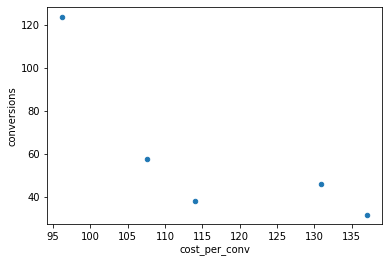

In [37]:
analysis[analysis["weekday"]=="Friday"].plot(x= "cost_per_conv", y = "conversions", kind = "scatter")


In [60]:
week = analysis[(analysis["date"]<"22-06-30") & (analysis["date"]>="22-06-23")].groupby("date")[['conversions','cost','impression_share','Absolute top impression percentage',"final","Conversion rate"]].mean().reset_index()
week["cost_per_conv"]= week['cost']/week["conversions"]
week


,date,conversions,cost,impression_share,Absolute top impression percentage,final,Conversion rate,cost_per_conv
0,22-06-23,35.26,3977.97,0.927500,0.728000,107.0,4.420000,112.818208
1,22-06-24,38.05,4335.68,0.914783,0.816957,107.0,6.250000,113.946912
2,22-06-25,43.06,4349.83,0.927826,0.827500,107.0,1.234000,101.017882
3,22-06-26,59.18,6423.13,0.950833,0.852083,107.0,4.319444,108.535485
4,22-06-27,53.56,6205.27,0.908400,0.796000,107.0,12.654706,115.856423
5,22-06-28,47.71,6289.11,0.886522,0.905652,107.0,4.178125,131.819535
6,22-06-29,34.75,5711.80,0.920455,0.895909,107.0,3.105333,164.368345


In [61]:
week["cost_per_conv"].mean()


121.19468418012045

In [21]:
rate= rate[1:]
rate

1     2.79
2     5.01
3    16.12
4    -5.62
5    -5.85
6   -12.96
Name: conversions, dtype: float64

In [22]:
week["cost_per_conv"].mean(),analysis[(analysis["date"]<"22-06-30") & (analysis["date"]>="22-06-23")][['conversions','cost','impression_share','Absolute top impression percentage',"final"]].mean()



(121.19468418012045,
 conversions                             44.510000
 cost                                  5327.541429
 impression_share                         0.919474
 Absolute top impression percentage       0.831729
 final                                  107.000000
 dtype: float64)

<AxesSubplot:>

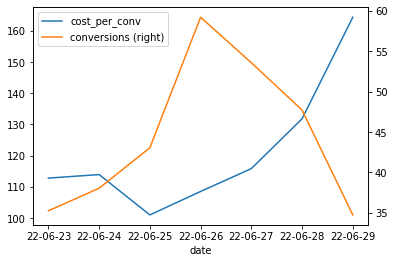

In [155]:
ax = week.plot(x= "date", y = "cost_per_conv",)
week.plot(x= "date", y = "conversions",ax = ax , secondary_y = True)

In [59]:
k = analysis
k =k[k['weekday']=="Friday"]["cost_per_conv"].min()
k


96.26132686084144

In [39]:
analysis = analysis.groupby('weekday')[['conversions','cost','impression_share','Absolute top impression percentage',"final","Conversion rate"]].mean()
analysis['cost_per_conv'] = analysis['cost']/analysis['conversions']

In [40]:
analysis

,conversions,cost,impression_share,Absolute top impression percentage,final,Conversion rate,cost_per_conv
weekday,,,,,,,
Monday,54.612,6718.270,0.919408,0.762477,109.6,5.713946,123.018201
Tuesday,48.724,5890.022,0.909375,0.829320,110.8,6.467103,120.885436
Wednesday,34.470,4727.570,0.909115,0.850947,110.8,5.150016,137.150276
Thursday,49.758,6594.098,0.931788,0.823206,105.4,3.703895,132.523373
Friday,59.574,6581.506,0.906547,0.805388,107.4,6.562319,110.476147
Saturday,50.114,5448.676,0.915569,0.773703,107.0,5.411524,108.725626
Sunday,55.704,6466.532,0.914510,0.804340,107.0,5.083193,116.087390


In [92]:
temp =data1[data1["date"]=='22-07-01'].groupby(["weekday"])[["conversions", "cost", "impression_share","final","Absolute top impression percentage"]].agg({"conversions":"sum","cost":"sum","impression_share":"mean", "final":"mean","Absolute top impression percentage":"mean"}).reset_index()
temp["cost_per_conv"]= temp["cost"]/temp["conversions"]                                                                                                                                                              
temp
                       

,weekday,conversions,cost,impression_share,final,Absolute top impression percentage,cost_per_conv
0,Monday,0.0,0.00,NaN,NaN,NaN,NaN
1,Tuesday,0.0,0.00,NaN,NaN,NaN,NaN
2,Wednesday,0.0,0.00,NaN,NaN,NaN,NaN
3,Thursday,0.0,0.00,NaN,NaN,NaN,NaN
4,Friday,32.0,4384.07,0.905833,107.0,0.832083,137.002187
5,Saturday,0.0,0.00,NaN,NaN,NaN,NaN
6,Sunday,0.0,0.00,NaN,NaN,NaN,NaN


In [83]:
temp =data1[data1["date"]=='22-06-30'].groupby(["weekday"])[["conversions", "cost", "impression_share","final","Absolute top impression percentage"]].agg({"conversions":"sum","cost":"sum","impression_share":"mean", "final":"mean","Absolute top impression percentage":"mean"}).reset_index()
temp["cost_per_conv"] = temp["cost"]/temp["conversions"]                                                                                                                                                              
temp

,weekday,conversions,cost,impression_share,final,Absolute top impression percentage,cost_per_conv
0,Monday,0.00,0.0,NaN,NaN,NaN,NaN
1,Tuesday,0.00,0.0,NaN,NaN,NaN,NaN
2,Wednesday,0.00,0.0,NaN,NaN,NaN,NaN
3,Thursday,52.44,6654.0,0.938696,107.0,0.881304,126.887872
4,Friday,0.00,0.0,NaN,NaN,NaN,NaN
5,Saturday,0.00,0.0,NaN,NaN,NaN,NaN
6,Sunday,0.00,0.0,NaN,NaN,NaN,NaN


In [613]:
# data1[data1["date"]=="22-07-06"]

In [680]:
data1["date"].max()

'31-05-22'

In [415]:
# data1["final"]

In [342]:
data1[data1['date'] == '22-06-15'][['conversions','cost']].sum()

conversions      39.60
cost           4831.74
dtype: float64

In [42]:
data requirement = latest one week data and 5 week day data 

avg_cpa = 0.4*(week average cpa value) + 0.6*(day average cpa value)
similarly avg conversion rate, avg impression share 
current_cpa = latest cpa value we took 12pm(night) today for next day recommendation

### from graph we know tcpa increase or decrease

### deciding max and min value 
max_limit = max of (5 days value of that day)
min_limit = min of (5 days value of that day)


### tcpa calculation 
TCPA = CPA or (CPA*1.01)

CPA(avg cpa, current cpa , avg day cpa , avg conversion rate, avg impression share, range limit of cpa value)

CPA = current cpa (+ or -) total Delta change cpa

total Delta change cpa = |delta_avg| + |delta_impression_share| + |delta_conversion_rate|


delta_avg = c1*(current cpa - avg cpa)/avg cpa*[current cpa]
[c1 = 0.5]

delta_impression_share = (current impression share - avg impression share)/avg impression share*[current cpa]

delta_conversion_rate = c2*(current conversion rate - avg conversion rate)/avg conversion rate*[current cpa]
[c2 = 0.05]




NameError: name 'CPA1' is not defined